ARIMA stands for Autoregressive Integrated Moving Average. The ARIMA model is a popular statistical technique used for Time Series Forecasting. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

I will first collect Google stock price data using the Yahoo Finance API.

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 10.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-macosx_11_0_arm64.whl size=263445 sha256=f3153b6f6b11fdedce8d0905dbbad49426be7add75a5003caf540ad65531d369
  Stored in directory: /Users/rupalimohapatra/Library/Caches/pip/wheels/95/86/dd/b798966d8df6cf023318915b1e12d01e44d5f1ff64aae51080
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
ERROR: pip's dependency resolver does not c

In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
today = date.today() #gets the current date
d1 = today.strftime("%Y-%m-%d") #converts today object into YYYY-MM-DD format which is required by Yahoo finance
end_date = d1 #Assigns today's date as the end date for the historical data retrieval.
#Subtracts 365 days (one year) from today's date to define the start date for the historical data retrieval.
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2023-11-28,138.280396,138.619995,138.660004,137.039993,137.630005,17046900
2023-11-29,136.065842,136.399994,139.669998,136.294998,138.985001,21014700
2023-11-30,133.591919,133.919998,136.960007,132.789993,136.399994,29913500
2023-12-01,132.993408,133.320007,133.500000,132.151993,133.320007,24258400
2023-12-04,130.309982,130.630005,131.449997,129.399994,131.294006,24117100


The above code will collect the stock price data from today to the last 360 days. In this dataset, Date is not a column, it’s the index of this dataset. To use this data for any data science task, we need to convert this index into a column. 

In [7]:
data["Date"] = data.index
data = data[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.head()

Price,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2023-11-28,137.630005,138.660004,137.039993,138.619995,138.280396,17046900
1,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.065842,21014700
2,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.591919,29913500
3,2023-12-01,133.320007,133.500000,132.151993,133.320007,132.993408,24258400
4,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.309982,24117100


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           252 non-null    datetime64[ns]
 1   (Open, GOOG)       252 non-null    float64       
 2   (High, GOOG)       252 non-null    float64       
 3   (Low, GOOG)        252 non-null    float64       
 4   (Close, GOOG)      252 non-null    float64       
 5   (Adj Close, GOOG)  252 non-null    float64       
 6   (Volume, GOOG)     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
data.tail()

Price,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
247,2024-11-20,178.830002,179.110001,175.330002,177.330002,177.330002,15729800
248,2024-11-21,175.455002,175.580002,165.309998,169.240005,169.240005,38839400
249,2024-11-22,167.160004,168.264999,165.710007,166.570007,166.570007,24497000
250,2024-11-25,167.990005,170.460007,167.399994,169.429993,169.429993,21395700
251,2024-11-26,169.490005,171.494995,169.429993,170.619995,170.619995,14926700


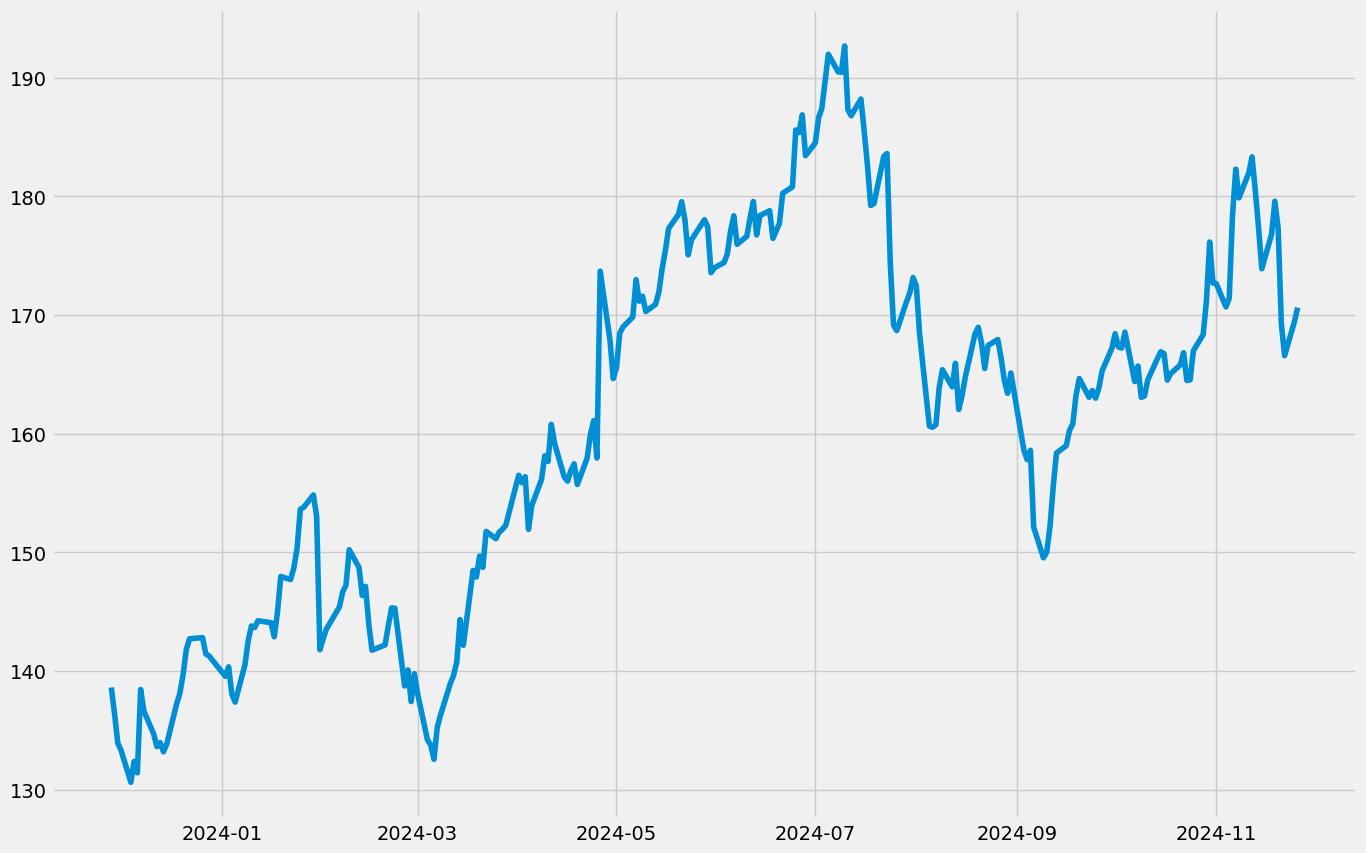

In [10]:
#Now let’s visualize the close prices of Google before moving forward
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

### Using ARIMA for time series forecasting
The visualization above about the closing stock prices shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data.

<Figure size 640x480 with 0 Axes>

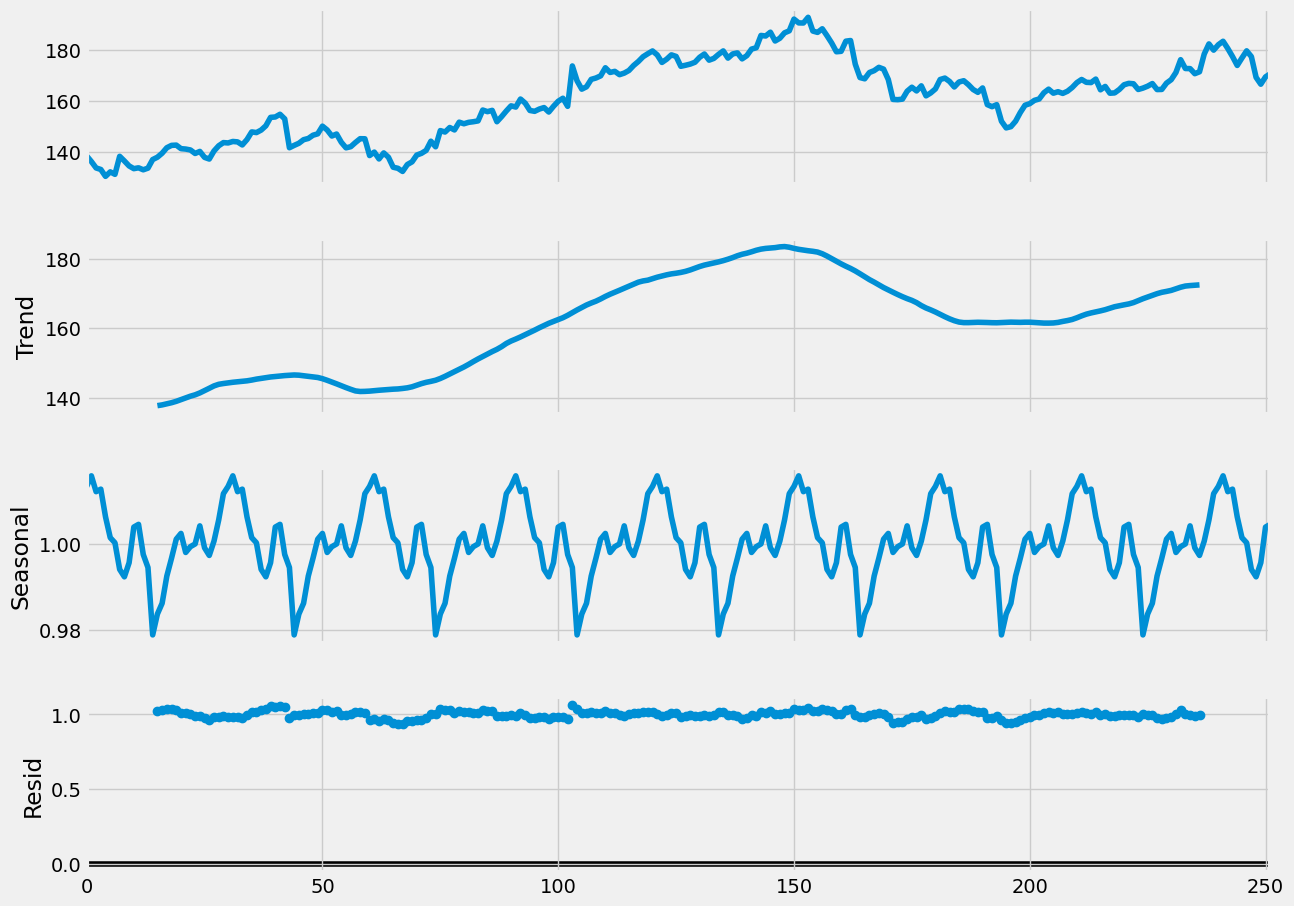

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. We need to find out the values of p, d and q

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

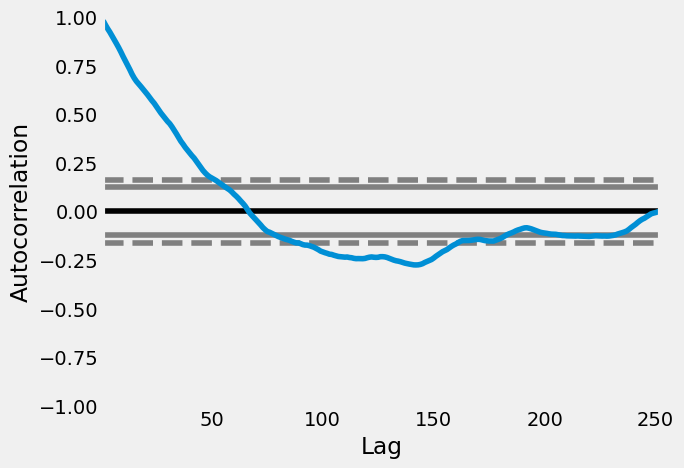

In [13]:
#let's find the value of p
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5.

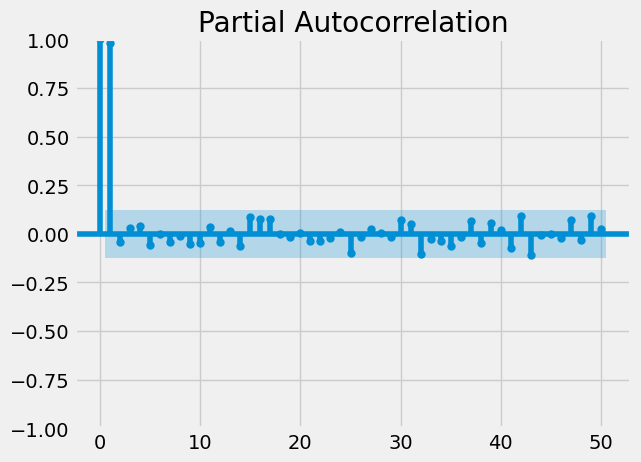

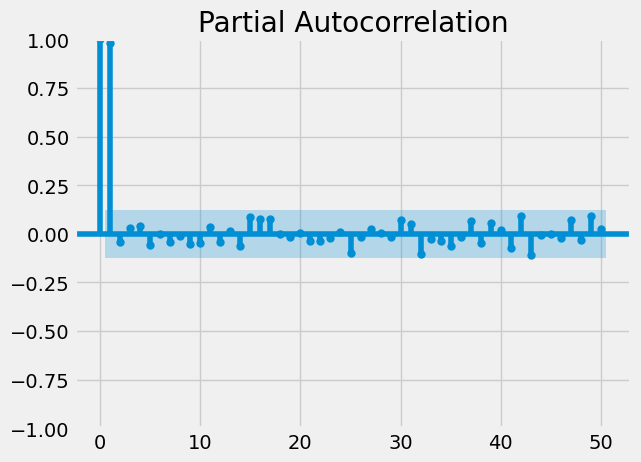

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 50)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2.

In [25]:
#Now let's build an ARIMA model
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data["Close"], order=(5, 1, 2))  

# Fit the model
fitted = model.fit()

# Print the summary
print(fitted.summary())

/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  252
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -603.408
Date:                Wed, 27 Nov 2024   AIC                           1222.816
Time:                        21:03:17   BIC                           1251.020
Sample:                             0   HQIC                          1234.166
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0775      0.079     13.586      0.000       0.922       1.233
ar.L2         -1.0282      0.090    -11.408      0.000      -1.205      -0.852
ar.L3         -0.0433      0.127     -0.342      0.7

/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      138.619989
2      136.414572
3      134.070603
4      133.694609
          ...    
247    179.254178
248    176.445867
249    169.099401
250    167.568860
251    170.750276
Name: predicted_mean, Length: 252, dtype: float64


In [27]:
#let's now uild a SARIMA model
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45547D+00    |proj g|=  1.04951D-01


 This problem is unconstrained.



At iterate    5    f=  2.35188D+00    |proj g|=  4.02417D-02

At iterate   10    f=  2.34055D+00    |proj g|=  5.03231D-03

At iterate   15    f=  2.34004D+00    |proj g|=  6.15103D-03

At iterate   20    f=  2.33493D+00    |proj g|=  2.77922D-02

At iterate   25    f=  2.33411D+00    |proj g|=  2.57204D-03

At iterate   30    f=  2.33407D+00    |proj g|=  9.01941D-04

At iterate   35    f=  2.33396D+00    |proj g|=  7.02764D-03

At iterate   40    f=  2.33367D+00    |proj g|=  1.00227D-03

At iterate   45    f=  2.33366D+00    |proj g|=  6.96667D-04


/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.33360D+00    |proj g|=  2.60719D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     57      1     0     0   2.607D-03   2.334D+00
  F =   2.3335963208333474     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -588.066
Date:                            Wed, 27 Nov 2024   AIC                           1206.1

In [28]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

252    171.668850
253    172.080918
254    170.860421
255    169.720780
256    170.644346
257    170.879732
258    171.664188
259    169.634796
260    168.293441
261    170.357965
262    170.969843
Name: predicted_mean, dtype: float64


<Axes: >

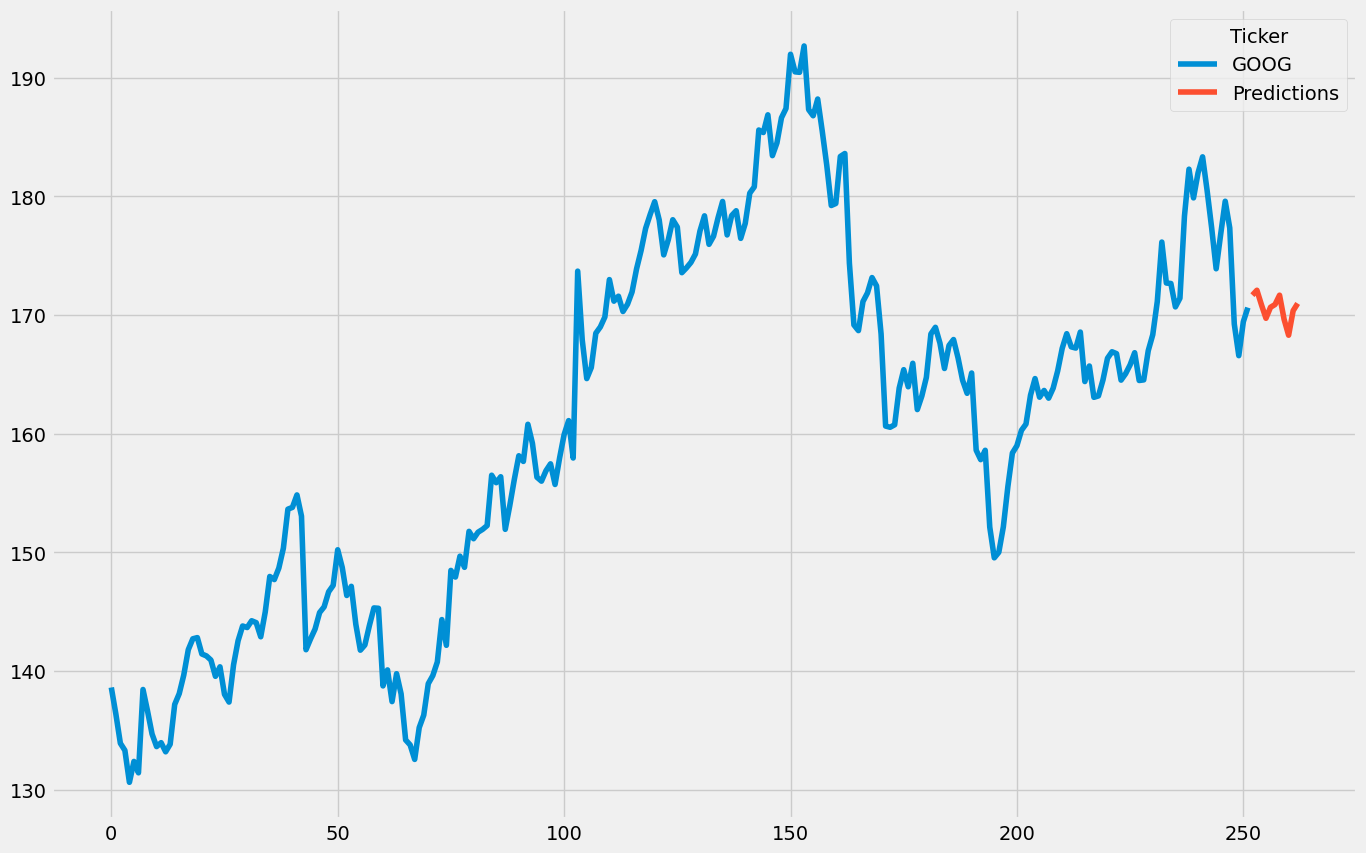

In [29]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")